<a href="https://colab.research.google.com/github/SimoneBendazzoli93/PINN/blob/main/1_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Programming model

#### Babylonian method square root
Compute $\sqrt{x}$.
##### How?
Continue $ s \leftarrow (s + x /s) / 2 $ till $ s \rightarrow \sqrt{x}$.

In [ ]:
### Python routine for implementation of Babylonian apporach

import numpy as np

def babylon(x, N):
    s = (1.0 + x)/2.0
    for i in range(1, N):
        s = (s + x/s) / 2.0
    return s

x = 2.0
print(f"Sqrt from Babylonian Approach: {babylon(x, 10)}")
print(f"Sqrt from NumPy Approach is: {np.sqrt(x)}")

Sqrt from Babylonian Approach: 1.414213562373095
Sqrt from NumPy Approach is: 1.4142135623730951


In [ ]:
### Python routine for differentiations of Babylonian routine

def diff_babylonian(x, N):
    s = (1.0 + x)/2.0
    s_prime = 1.0/ 2.0
    for i in range(1, N):
        s = (s + x/s) / 2.0
        s_prime = (1/2.0)*(s_prime + (s - x * s_prime)/(s**2))
    return s, s_prime

s, s_prime = diff_babylonian(2, 10)

print(f"value of sqrt(x) is : {s}")
print(f"Derivative of sqrt(x) is: {s_prime}")
print(f"Analytical derivative of sqrt(x) is: {0.5 *1/np.sqrt(2)}")


value of sqrt(x) is : 1.414213562373095
Derivative of sqrt(x) is: 0.35355339059327373
Analytical derivative of sqrt(x) is: 0.35355339059327373


In [ ]:
!pip install sympy

You should consider upgrading via the '/Users/raj/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [ ]:
import sympy as sp
x = sp.symbols("x")

# Symbolic for Function Evaluation
print("Symbolic for Function Evaluation")
for i in range(0, 5):
    print(sp.simplify(babylon(x, i)))

print("***********+++++++***********")
print("***********+++++++***********")
print("***********+++++++***********")
print("Symbolic for Derivative Evaluation")
for i in range(0, 5):
    print(sp.simplify(sp.simplify(sp.diff(babylon(x, i)))))

Symbolic for Function Evaluation
0.5*x + 0.5
0.5*x + 0.5
0.25*x + 1.0*x/(x + 1) + 0.25
(0.015625*x**4 + 0.4375*x**3 + 1.09375*x**2 + 0.4375*x + 0.015625)/(0.125*x**3 + 0.875*x**2 + 0.875*x + 0.125)
(6.103515625e-5*x**8 + 0.00732421875*x**7 + 0.111083984375*x**6 + 0.48876953125*x**5 + 0.7855224609375*x**4 + 0.48876953125*x**3 + 0.111083984375*x**2 + 0.00732421875*x + 6.103515625e-5)/(0.0009765625*x**7 + 0.0341796875*x**6 + 0.2666015625*x**5 + 0.6982421875*x**4 + 0.6982421875*x**3 + 0.2666015625*x**2 + 0.0341796875*x + 0.0009765625)
***********+++++++***********
***********+++++++***********
***********+++++++***********
Symbolic for Derivative Evaluation
0.500000000000000
0.500000000000000
0.25 + 1.0/(x + 1)**2
(0.0009765625*x**6 + 0.013671875*x**5 + 0.1435546875*x**4 + 0.33203125*x**3 + 0.3662109375*x**2 + 0.123046875*x + 0.0205078125)/(0.0078125*x**6 + 0.109375*x**5 + 0.4921875*x**4 + 0.78125*x**3 + 0.4921875*x**2 + 0.109375*x + 0.0078125)
(3.72529029846191e-9*x**20 + 3.87430191040039

## Dual Numbers

### Addition rule
$$
h(x) = f(x) + g(x)
$$
$$
h'(x) = f'(x) + g'(x)
$$


### Product rule
$$
h(x) = f(x)*g(x)
$$

$$
h'(x) = f'(x)*g(x) + g'(x)f(x)
$$

### Quotient rule
$$
h(x) = \frac{f(x)}{g(x)}
$$
$$
h'(x) = \frac{g(x)f'(x) -f(x)g'(x)}{g(x)^2}
$$

### Chain rule
$$
f(x) = g(h(x))
$$

$$
f'(x) = g'(h(x))h'(x)
$$

Consider $f(x) = \sin(h(x))$
$$
\frac{\rm d}{\rm dx} \sin(h(x)) = \cos(h(x))\frac{\rm dh}{\rm dx}
$$

In [ ]:
from math import sin, cos

class Dual(object):
    def __init__(self, x, ϵ=1):
        self.x = x
        self.ϵ = ϵ

    def __str__(self):
        return str(self.x) + " + " + str(self.ϵ) + "ϵ"

    def __mul__(self, d):
        return Dual(self.x * d.x, self.x*d.ϵ + d.x*self.ϵ)

    def __add__(self, d):
        return Dual(self.x + d.x, self.ϵ + d.ϵ)

    def __truediv__(self, d):
        return Dual(self.x/d.x, ((d.x *self.ϵ - d.ϵ * self.x )/d.x**2))

    def d_sin(self):
        return Dual(sin(self.x), cos(self.x)*self.ϵ)

In [ ]:
print(Dual(3))
D=Dual(3) + Dual(3) + Dual(3, 0)  ## 2*x + 3
print(D)
# print(f"Differentiation of addition is {D}")

# D = Dual(3)*Dual(3)  ## x**2
# print(f"Differentiation of multiplication is {D}")

# D = Dual(6)/Dual(3)  ## x**2
# print(f"Differentiation of division is {D}")


# d = Dual(3)
# D = d.d_sin()
# print(f"Differentiation of sin function is {D}")


3 + 1ϵ
9 + 2ϵ


<div>
<img src="https://discuss.pytorch.org/uploads/default/original/2X/3/35226d9fbc661ced1c5d17e374638389178c3176.png" width="500" style="margin: 55px auto; display: block; position: relative; left: -30px;" />
</div>

<!--NAVIGATION-->
# PyTorch Primer | [TensorFlow Primer](2-tf.ipynb) |  [PyTorch vs TensorFlow](3-pytorch_vs_tf.ipynb) |  [JAX](4-jax.ipynb)

## Submodule -1.4 : A Primer on PyTorch and Tensorflow

## Table of Contents

#### 1. [Installation](#Building-PyTorch-and-TensorFlow)
#### 2. [Visualizing graph based computation](#Cosntruct-the-Graph-(Tree)-of-following-expressions)
#### 3. [Basics of PyTorch](#Basics-of-PyTorch)
#### 4. [Automatic Differentiation](#Automatic-Differentiation)
#### 5. [Function Approximations](#Function-Approximations)


# Building PyTorch and TensorFlow

### Install PyTorch

In [ ]:
!pip3 install torch torchvision torchaudio

### Install TensorFlow2

In [ ]:
!pip3 install tensorflow

### Packages in current environment

In [ ]:
#!pip freeze


In [ ]:
#!pip install graphviz
#!pip install seaborn


In [ ]:
# Import the things we need to plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')

## Readings

+ These notes.

+ [Conceptual Programming with Python By Thorsten Altenkirch and Isaac Triguero](https://www.lulu.com/en/gb/shop/isaac-triguero-and-thorsten-altenkirch/conceptual-programming-with-python/paperback/product-1e4re5rj.html?page=1&pageSize=4)


# Cosntruct the Graph (Tree) of following expressions

Evaluate following expressions by designing the premitives
$$
ex1: 3*(y + x)
$$

and
$$
ex2: 3*y + x
$$

###### Cosntruct the Graph (Tree) of above expressions

8*(y+x)


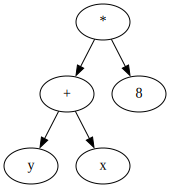

In [ ]:
print("8*(y+x)")
from graphviz import Digraph
g1 = Digraph('ex1')
g1.node('*', label='*')
g1.node('+', label='+')
g1.node('8', label='8')
g1.node('y', label='y')
g1.node('x', label='x')
g1.edge('*','8')
g1.edge('*','+')
g1.edge('+', 'y')
g1.edge('+', 'x')
g1.render('ex1', format='png') # Uncomment if you want to save the figure
g1


8*y+x


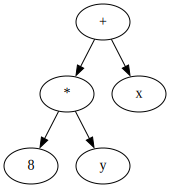

In [ ]:
print("8*y+x")
g2 = Digraph('ex2')
g2.node('*', label='*')
g2.node('+', label='+')
g2.node('8', label='8')
g2.node('y', label='y')
g2.node('x', label='x')
g2.edge('+','*')
g2.edge('+','x')
g2.edge('*', '8')
g2.edge('*', 'y')
g2.render('ex2', format='png') # Uncomment if you want to save the figure
g2

In [ ]:
print(5.0)

5.0


In [ ]:
# Super class for Expressions:

class Expr:
    pass

### Subclass of Expr for Constant e.g., 3

class Const(Expr):
    def __init__(self, val):
        self.val = val

    def getVal(self):
        return self.val

    def __str__(self):
        return str(self.getVal())

    def eval(self, env):
        return self.getVal()

### Subclass of Expr for Variables e.g., x, y
class Var(Expr):
    def __init__(self, name):
        self.name = name

    def getName(self):
        return self.name

    def __str__(self):
        return self.getName()

    def eval(self, env):
        return env[self.name]

### Subclass of Expr for Binary Operations: e.g., x, y
class Times(Expr):
    def __init__(self, l, r):
        self.l = l
        self.r = r

    def getLeft(self):
        return self.l

    def getRight(self):
        return self.r

    def __str__(self):
        return "(" + str(self.getLeft()) + "*" + str(self.getRight()) + ")"

    def eval(self, env):
        return self.getLeft().eval(env)*self.getRight().eval(env)

class Plus(Expr):
    def __init__(self, l, r):
        self.l = l
        self.r = r
    def __str__(self):
        return "(" + str(self.l) + "+" + str(self.r) + ")"

    def getLeft(self):
        return self.l

    def getRight(self):
        return self.r

    def eval(self, env):
        print(f"Printing Eval {env}")
        return self.getLeft().eval(env) + self.getRight().eval(env)

### Let's print ex1: 8*(y + x)

ex1 = Times(Const(8), Plus(Var("y"),Var("x")))

### Let's print ex1: 3*y + x
ex2 = Plus(Times(Const(8), Var("y")), Var("x"))

print(ex1)
print(ex2)

(8*(y+x))
((8*y)+x)


In [ ]:
# Evaluate The Expressions
vals = {"x":5, "y":10}
ex1.eval(vals)


Printing Eval {'x': 5, 'y': 10}


120

# Basics of PyTorch

#### Tensors and Properties

In [ ]:
import torch

In [ ]:
import numpy as np

In [ ]:
# Set seed for reproducibility
np.random.seed(0)


# Predefine Matrix of shape=(2,3)
np.array([[4, 5, 6], [1, 7, 8]])

# Zero Matrix of shape=(3,3)
np.zeros((3,3))

# Identity Matrix of shape=(2,2)
np.eye(2)

# Random Matrix of shape=(3,3)
np.random.rand(3,3)

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276]])

In [ ]:
# Set seed for reproducibility
torch.manual_seed(0)


# Predefine Matrix of shape=(2,3)
torch.tensor([[4, 5, 6], [1, 7, 8]])

# Zero Matrix of shape=(3,3)
torch.zeros((3,3))

# Identity Matrix of shape=(2,2)
torch.eye(2)

# Random Matrix of shape=(3,3)
torch.rand(3,3)

tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341],
        [0.4901, 0.8964, 0.4556]])

In [ ]:
##### Dimension operations on Tensors.

# Scalar
s = torch.tensor(1.)
print(f"Sclaer x: {s}")

# Check dimension of Scalar
d = s.dim()
print(f"Dimension of vector is: {d}")

# Vectors
v = torch.tensor([1., 2., 3.])
print(f"Vector v: {v}")
#Check dimension of Vectors
d = v.dim()
print(f"Dimension of vector is: {d}")


# Matrix
m = torch.tensor([[1., 2., 3.],[4., 5., 6.]])
d = m.dim()
print(f"Dimension of matrix is: {d}")


# Tensor
# Matrix
m = torch.tensor([[[1., 2., 3.],[4., 5., 6.], [1., 2., 3.],[4., 5., 6.]]])
d = m.dim()
print(f"Dimension of Tensor is: {d}")




Sclaer x: 1.0
Dimension of vector is: 0
Vector v: tensor([1., 2., 3.])
Dimension of vector is: 1
Dimension of matrix is: 2
Dimension of Tensor is: 3


#### Methods on Tensors

###### Sum

In [ ]:
# Set seed for reproducibility
torch.manual_seed(0)


# Random Matrix of shape=(3,3)
x = torch.rand(3,2)
print(f"x: {x}")

xsum = torch.sum(x, dim=1)
print(f"xsum using mthod1: {xsum}")

x.sum(dim=1)
print(f"xsum using mthod2: {xsum}")



x: tensor([[0.4963, 0.7682],
        [0.0885, 0.1320],
        [0.3074, 0.6341]])
xsum using mthod1: tensor([1.2645, 0.2205, 0.9415])
xsum using mthod2: tensor([1.2645, 0.2205, 0.9415])


###### Reshape : `view` and  `reshape`  methods

In [ ]:
#### Inplace Reshaping

# A vector of length N=10
x = torch.tensor([1,2,3,4,5,6,7,8,9,10, 11, 12])
# Reshape in amatrix of shape= (2,5)
x.view(3,4)

# Reshape with unspecified number of rows and 4 column
x.view(-1, 4)

#### Reshaping via copying

# A vector of length N=10
x = torch.tensor([1,2,3,4,5,6,7,8,9,10,11,12])

# Reshape in amatrix of shape= (2,5)
y3 = x.reshape(3,4)

# Reshape with unspecified number of rows and 4 column
y4 = x.reshape(-1,4)

###### Computing Norm of a vector using `norm` method

$$
L_p~\text{norm}:
||{\mathbf{x}}||_p = \left(\sum_i |x_i|^p\right)^{\frac{1}{p}}
$$


$$
L^1~\text{norm}:
|| {\mathbf{x}} ||_1 = |x_1| + |x_2| + \ldots + |x_n|
$$

$$
L^2~\text{norm}:
|| {\mathbf{x}} ||_2 = \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2}
$$



In [ ]:
torch.manual_seed(0)
x = torch.rand(3)
x.norm(p=1)
x.norm(p=2)
print(f"L1 Norm of x is:{x.norm(p=1)}")
print(f"L2 Norm of x is:{x.norm(p=2)}")

L1 Norm of x is:1.3529558181762695
L2 Norm of x is:0.9188381433486938


###### Computing Norm of a vector without using the method

In [ ]:
n1 = torch.sum(torch.abs(x))
print(f"L1 norm: is: {n1}")
n2 = torch.sqrt(torch.sum(x**2))
print(f"L2 norm: is: {n2}")

## Or Calling method directly on the data structures
n1 = x.abs().sum()
print(f"L1 norm: is: {n1}")
n2 = (x**2).sum().sqrt()
print(f"L2 norm: is: {n2}")

L1 norm: is: 1.3529558181762695
L2 norm: is: 0.9188381433486938
L1 norm: is: 1.3529558181762695
L2 norm: is: 0.9188381433486938


### Tensors on GPU

In [ ]:
import torch
torch.cuda.is_available()  # Check if we can use GPUs

False

In [ ]:
x = torch.Tensor([[4,5,8], [3,8,9]])

### Mapping tensors to GPU

In [ ]:
dev_cpu = torch.device("cpu")
dev_gpu = torch.device("cuda:0")

# Send Tensor to GPU
x.to(dev_cpu)


tensor([[4., 5., 8.],
        [3., 8., 9.]])

In [ ]:
# At the start of your code
device = torch.device("cpu" if not torch.cuda.is_available() else "cuda")

# For later dispatch
x.to(device)

tensor([[4., 5., 8.],
        [3., 8., 9.]])

### NumPy ----> PyTorch ----> NumPy

In [ ]:
import numpy as np

x = np.random.random((4,4))
print(x)

[[0.38344152 0.79172504 0.52889492 0.56804456]
 [0.92559664 0.07103606 0.0871293  0.0202184 ]
 [0.83261985 0.77815675 0.87001215 0.97861834]
 [0.79915856 0.46147936 0.78052918 0.11827443]]


In [ ]:
# NumPy to PyTorch
Y = torch.from_numpy(x)
print(Y)

tensor([[0.3834, 0.7917, 0.5289, 0.5680],
        [0.9256, 0.0710, 0.0871, 0.0202],
        [0.8326, 0.7782, 0.8700, 0.9786],
        [0.7992, 0.4615, 0.7805, 0.1183]], dtype=torch.float64)


In [ ]:
# PyTorch ---> NumPy

In [ ]:
X = Y.numpy()
#print(X)

### Timing GPU Operations

In [ ]:
A = torch.rand(100, 400, 400)
#B = A.cuda()
A.size()

torch.Size([100, 400, 400])

In [ ]:
%timeit -n 3 torch.bmm(A, A)
#%timeit -n 3 torch.bmm(B, B)

27.2 ms ± 5.42 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)



$$
a = 8\\
b = 6\\
c = a + b\\
d = a * c\\
$$
Compute $ \frac{\partial d}{\partial a}$
High School Approach:

1. $\qquad d = a*c$

2. $\qquad  \frac{\partial d}{\partial a} = c * \frac{\partial a}{\partial a} + a * \frac{\partial c}{\partial a}$

3. $\qquad  \frac{\partial d}{\partial a} = c + a* \frac{\partial c}{\partial a}$
4. $\qquad  \frac{\partial d}{\partial a} = (a + b) + a*\frac{\partial a}{\partial a} + a * \frac{\partial b}{\partial a} $
5. $\qquad  \frac{\partial d}{\partial a} = a + b + a*(1 + 0)$
6. $\qquad  \frac{\partial d}{\partial a} = 2a + b $
7. $\qquad  \frac{\partial d}{\partial a} = 2*8+ 6 = 22 $

In case if you need to $\frac{\partial d}{\partial b}$, steps 1-7 need to carried out again.
"

# Automatic Differentiation

In [ ]:
from collections import defaultdict
class Var:
    def __init__(self, val, local_grad=()):
        self.val = val
        self.local_grad = local_grad

    def __add__(self, other):
        y = self.val + other.val
        local_grad = ((self, 1), (other, 1))
        return Var(y, local_grad)

    def __mul__(self, other):
        y = self.val*other.val
        local_grad = ((self, other.val), (other, self.val))
        return Var(y, local_grad)

    def __sub__(self, other):
        y = self.val - other.val
        local_grad = ((self, 1), (other, -1))
        return Var(y, local_grad)


def get_grads(var):
    grad = defaultdict(lambda:0)

    def compute_grad(var, path):
        for child_var, loc_grad in var.local_grad:
            val_path_child = path * loc_grad
            grad[child_var] += val_path_child
            compute_grad(child_var,val_path_child)

    compute_grad(var, path=1)

    return grad








In [ ]:
a = Var(8)
b = Var(6)

## AD for Addition

c = a + b
d = a*c

grad = get_grads(d)

print(f"AD of addition: {grad[a]}")

## AD for Subtraction

c = a - b
d = a*c

grad = get_grads(d)

print(f"AD of subtraction: {grad[a]}")



AD of addition: 22
AD of subtraction: 10


# Einstein Summation

In [ ]:
import torch
torch.manual_seed(1234)

In [ ]:
A=torch.randint(3, 10, (3, 4))
B=torch.randint(3, 10, (4, 3))
A



tensor([[9, 7, 3, 8],
        [3, 4, 9, 7],
        [3, 5, 5, 6]])

In [ ]:
B


tensor([[4, 8, 3],
        [6, 7, 4],
        [9, 8, 6],
        [4, 5, 8]])

In [ ]:
torch.matmul(A, B)

tensor([[137, 185, 137],
        [145, 159, 135],
        [111, 129, 107]])

In [ ]:
C= torch.einsum("ij, jk -> ik", A, B)
C

tensor([[137, 185, 137],
        [145, 159, 135],
        [111, 129, 107]])

In [ ]:
torch.manual_seed(1234)
A=torch.randint(3, 10, (3, 4, 3))
B=torch.randint(3, 10, (3, 3, 4))
A



tensor([[[9, 7, 3],
         [8, 3, 4],
         [9, 7, 3],
         [5, 5, 6]],

        [[4, 8, 3],
         [6, 7, 4],
         [9, 8, 6],
         [4, 5, 8]],

        [[7, 8, 8],
         [9, 6, 4],
         [7, 4, 5],
         [7, 7, 6]]])

In [ ]:
B

tensor([[[7, 5, 4, 4],
         [5, 6, 4, 6],
         [3, 7, 3, 8]],

        [[8, 6, 8, 6],
         [7, 9, 8, 4],
         [8, 4, 8, 5]],

        [[5, 9, 7, 4],
         [5, 5, 7, 3],
         [8, 7, 3, 7]]])

In [ ]:
C = torch.einsum("bij, bjk->bik", A,B)
C

tensor([[[107, 108,  73, 102],
         [ 83,  86,  56,  82],
         [107, 108,  73, 102],
         [ 78,  97,  58,  98]],

        [[112, 108, 120,  71],
         [129, 115, 136,  84],
         [176, 150, 184, 116],
         [131, 101, 136,  84]],

        [[139, 159, 129, 108],
         [107, 139, 117,  82],
         [ 95, 118,  92,  75],
         [118, 140, 116,  91]]])

In [ ]:
Ct = torch.matmul(A, B)

In [ ]:
Ct


tensor([[[107, 108,  73, 102],
         [ 83,  86,  56,  82],
         [107, 108,  73, 102],
         [ 78,  97,  58,  98]],

        [[112, 108, 120,  71],
         [129, 115, 136,  84],
         [176, 150, 184, 116],
         [131, 101, 136,  84]],

        [[139, 159, 129, 108],
         [107, 139, 117,  82],
         [ 95, 118,  92,  75],
         [118, 140, 116,  91]]])

# Function Approximations

### Parabolic Function

In [ ]:
!pip install torchsummary

You should consider upgrading via the '/Users/raj/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


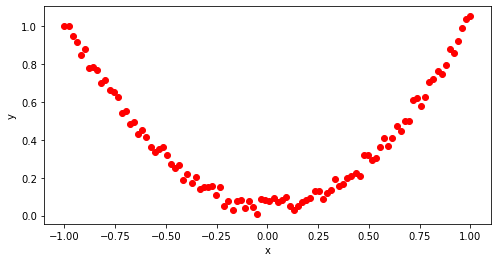

In [ ]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
from torch.optim import Adam, LBFGS, SGD
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
%matplotlib inline


torch.manual_seed(1234)

N_p = 100

### Input data
x = torch.unsqueeze(torch.linspace(-1, 1, N_p), dim=1)
# torch.unsqueeze: Returns a new tensor
# with a dimension of size one inserted at the specified position.
y = torch.square(x)
# Add Random Noise
y = y + 0.1*torch.rand(y.size())

# Plot the data
plt.figure(figsize=(8,4))

x_plot, y_plot = x.numpy(), y.numpy()
plt.scatter(x_plot, y_plot, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show("Data for Regression Analysis")
plt.show()







----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 100, 40]              80
         LeakyReLU-2              [-1, 100, 40]               0
            Linear-3               [-1, 100, 1]              41
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.00
Estimated Total Size (MB): 0.06
----------------------------------------------------------------
Doing Iterations: 0 and Loss: 0.23471900820732117


<ipython-input-83-f8a58e45b641>:42: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(m.weight)


Doing Iterations: 50 and Loss: 0.0038674066308885813
Doing Iterations: 100 and Loss: 0.0017179547576233745
Doing Iterations: 150 and Loss: 0.0010395834688097239


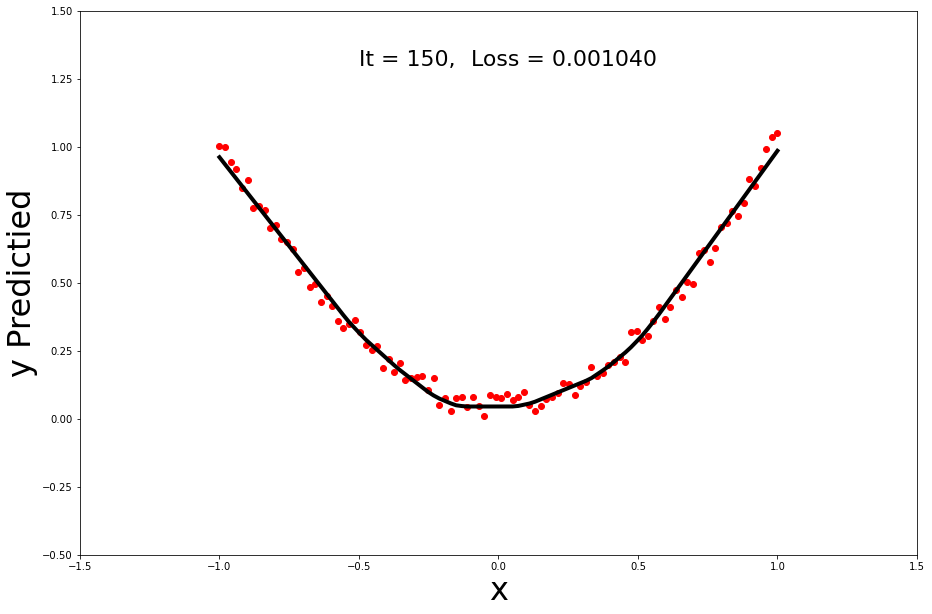

In [ ]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
from torch.optim import Adam, LBFGS, SGD
import matplotlib.pyplot as plt
%matplotlib inline
from torchsummary import summary



torch.manual_seed(1234)

### Input data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
# torch.unsqueeze: Returns a new tensor
# with a dimension of size one inserted at the specified position.

y = torch.square(x)
# Add Random Noise
y = y + 0.1*torch.rand(y.size())



# Convert x and y to tracked variables

in_dim = 1
out_dim = 1

Net = torch.nn.Sequential(
      torch.nn.Linear(in_dim, 40),
      torch.nn.LeakyReLU(),
      torch.nn.Linear(40, out_dim))


summary(Net, (100, 1))

# def init_weights(m):
#     if isinstance(m, torch.nn.Linear):
#         torch.nn.init.xavier_uniform(m.weight)
#         m.bias.data.fill_(0.00)

# Net.apply(init_weights)

# for name, params in Net.named_parameters():
#     if params.requires_grad:
#         print(f"name: {name}")
#         print(f"Params: {params}")


optimizer = torch.optim.Adam(Net.parameters(), lr = 0.01)
loss_function = torch.nn.MSELoss()

image_list = []
Niter = 150 + 1

fig, ax = plt.subplots(figsize=(15,10))

for it in range(Niter):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if it % 50 == 0:
        print(f"Doing Iterations: {it} and Loss: {loss}")
    plt.cla()
    ax.set_xlabel('x', fontsize=32)
    ax.set_ylabel('y Predictied', fontsize=32)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.scatter(x_plot, y_plot, color = "red")
    ax.plot(x_plot, y_pred.data.numpy(), 'k-', lw=4)
    ax.text(-0.5, 1.3, 'It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
    ax.text(-0.1, 1.3, 'Loss = %.6f' % loss.data.numpy(),
            fontdict={'size': 22, 'color':  'black'})

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    image_list.append(image)



imageio.mimsave('./Parabolic_regression_1.gif', image_list, fps=5)




### Sin Function

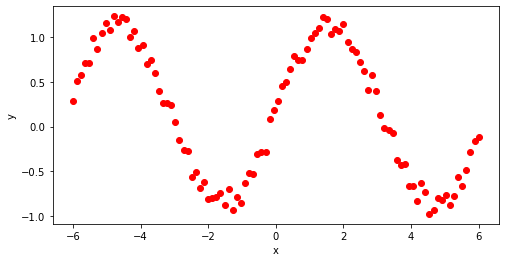

In [ ]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(1234)

### Input data
x = torch.unsqueeze(torch.linspace(-6, 6, 100), dim=1)
# torch.unsqueeze: Returns a new tensor
# with a dimension of size one inserted at the specified position.
y = torch.sin(x)
# Add Random Noise
y = y + 0.30*torch.rand(y.size())

# Plot the data
plt.figure(figsize=(8,4))

x_plot, y_plot = x.numpy(), y.numpy()
plt.scatter(x_plot, y_plot, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show("Data for Regression Analysis")
plt.show()


Doing Iterations: 0 and Loss: 0.8034062385559082
Doing Iterations: 50 and Loss: 0.11373567581176758
Doing Iterations: 100 and Loss: 0.10786443948745728
Doing Iterations: 150 and Loss: 0.1027265340089798
Doing Iterations: 200 and Loss: 0.09231911599636078
Doing Iterations: 250 and Loss: 0.0758381336927414
Doing Iterations: 300 and Loss: 0.05385994538664818
Doing Iterations: 350 and Loss: 0.0337362065911293
Doing Iterations: 400 and Loss: 0.019557828083634377
Doing Iterations: 450 and Loss: 0.014799895696341991
Doing Iterations: 500 and Loss: 0.012736027128994465
Doing Iterations: 550 and Loss: 0.0102080674842
Doing Iterations: 600 and Loss: 0.009226702153682709
Doing Iterations: 650 and Loss: 0.008671664632856846
Doing Iterations: 700 and Loss: 0.007980658672749996
Doing Iterations: 750 and Loss: 0.007601229008287191
Doing Iterations: 800 and Loss: 0.007699568290263414
Doing Iterations: 850 and Loss: 0.0173762496560812
Doing Iterations: 900 and Loss: 0.0065982164815068245
Doing Iteratio

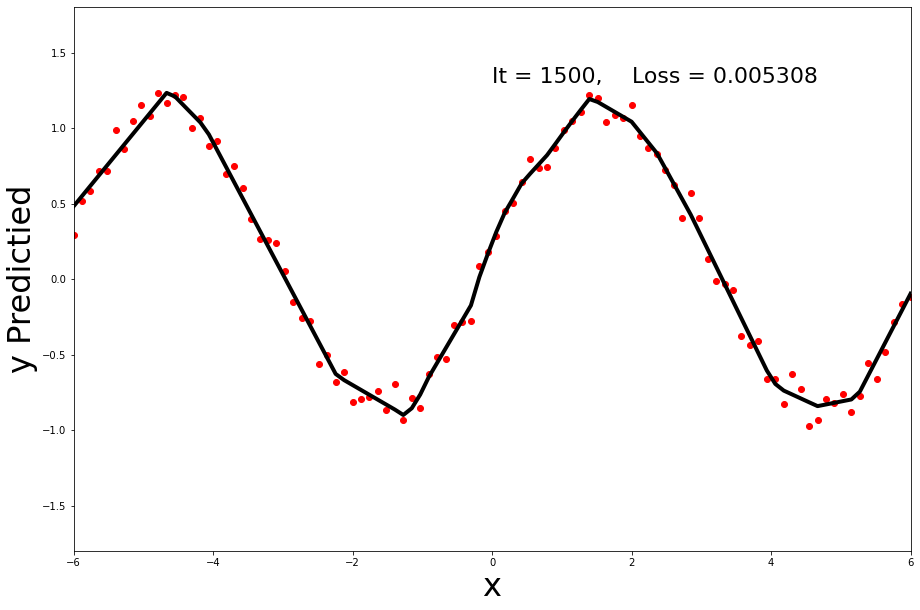

In [ ]:
# Convert x and y to tracked variables
x = Variable(x)
y = Variable(y)

Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.LeakyReLU(),
      torch.nn.Linear(100, 1))

optimizer = torch.optim.Adam(Net.parameters(), lr = 0.01)
loss_function = torch.nn.MSELoss()

image_list = []
Niter = 1500 + 1

fig, ax = plt.subplots(figsize=(15,10))

for it in range(Niter):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer.step()
    if it % 50 == 0:
        print(f"Doing Iterations: {it} and Loss: {loss}")
    plt.cla()
    ax.set_xlabel('x', fontsize=32)
    ax.set_ylabel('y Predictied', fontsize=32)
    ax.set_xlim(-6, 6)
    ax.set_ylim(-1.8, 1.8)
    ax.scatter(x_plot, y_plot, color = "red")
    ax.plot(x_plot, y_pred.data.numpy(), 'k-', lw=4)
    ax.text(0, 1.3, 'It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
    ax.text(2, 1.3, 'Loss = %.6f' % loss.data.numpy(),
            fontdict={'size': 22, 'color':  'black'})

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    image_list.append(image)



imageio.mimsave('./Sin_Regression_2.gif', image_list, fps=20)

### Customizing Function

In [ ]:
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
import numpy as np
import matplotlib.pyplot as plt

'''
clu = x * sigmoid(x) = (1/ (1 + exp(-x)))
'''


def caf(x):
    return x * (1.0/(1.0 + torch.exp(-x)))

<ipython-input-6-0dadf7916b2b>:1: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /tmp/pip-req-build-_4mbk50o/aten/src/ATen/native/RangeFactories.cpp:25.)
  x = torch.linspace(-10, 10).view((-1, 1))


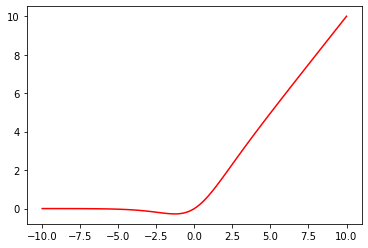

In [ ]:
x = torch.linspace(-10, 10).view((-1, 1))
y = caf(x)
plt.plot(x, y, "-r")

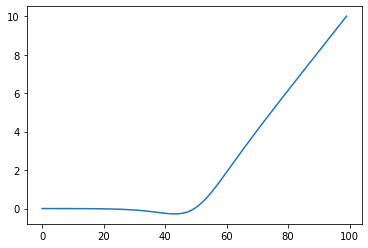

In [ ]:
class CAF(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        return caf(x)

custom_af = CAF()

Net = torch.nn.Sequential(
     CAF()
     )

y = Net(x)

plt.plot(y.detach().numpy())

('Linear-1.weight', Parameter containing:
tensor([[ 0.9132],
        [ 0.9395],
        [-0.4091],
        [ 0.1909],
        [ 0.9695],
        [ 0.7378],
        [ 0.5077],
        [ 0.9854],
        [ 0.9713],
        [ 0.2693],
        [ 0.7384],
        [ 0.1516],
        [ 0.0106],
        [ 0.6430],
        [-0.0820],
        [-0.7945],
        [-0.3422],
        [ 0.3764],
        [ 0.3546],
        [-0.6190],
        [ 0.5505],
        [ 0.3775],
        [ 0.5873],
        [-0.4548],
        [ 0.2216],
        [ 0.4516],
        [-0.2410],
        [ 0.8732],
        [ 0.4424],
        [ 0.9401],
        [-0.4402],
        [ 0.3134],
        [-0.2704],
        [-0.7939],
        [ 0.8844],
        [-0.0355],
        [-0.7825],
        [ 0.6994],
        [-0.2284],
        [ 0.7483],
        [-0.3458],
        [-0.2138],
        [-0.7022],
        [-0.7431],
        [ 0.8225],
        [-0.0262],
        [-0.0709],
        [ 0.7240],
        [ 0.1388],
        [ 0.0276],
        

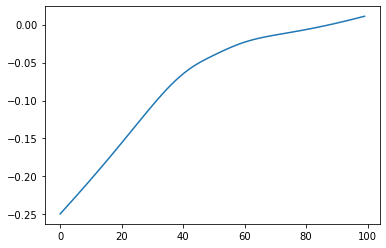

In [ ]:
from torchsummary import summary


class CAF(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.Tensor([0.1]), requires_grad=True)
        self.N = 10.0

    def forward(self, x):
        return  self.a * caf(x)

custom_af = CAF()

Net = torch.nn.Sequential()
Net.add_module("Linear-1", torch.nn.Linear(1, 100))
Net.add_module("Customized AF",  CAF())
Net.add_module("Linear-2",   torch.nn.Linear(100, 1))



y = Net(x)

for parameter in Net.named_parameters():
    print(parameter)

plt.plot(y.detach().numpy())

In [ ]:
summary(Net, (100,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
               CAF-1               [-1, 100, 1]               0


AttributeError: 'int' object has no attribute 'numpy'